In [11]:
import numpy as np
import matplotlib.pyplot as plt
import diff_util

In [12]:
predicted = '/scr-ssd/coconutrubenasmr/regnet/ckpt/exp18/ASMR_Addictive_Tapping_1_Hr_No_Talking-299-of-365.npy'
real = '/scr-ssd/coconutrubenasmr/regnet/ckpt/exp18/ASMR_Addictive_Tapping_1_Hr_No_Talking-299-of-365_gt.npy'

In [13]:
p_arr = np.load(predicted)
r_arr = np.load(real)

In [14]:
print(p_arr.shape)

(80, 1720)


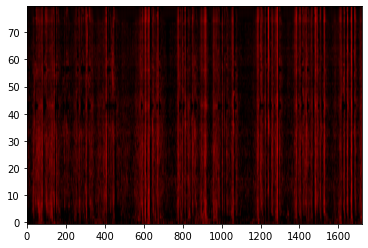

In [15]:
h, w = p_arr.shape
dm = diff_util.diff_image(p_arr, r_arr)
dm[dm < 0.] = 0.
plt.imshow(dm, aspect='auto', origin='lower')

In [5]:
diff = p_arr - r_arr

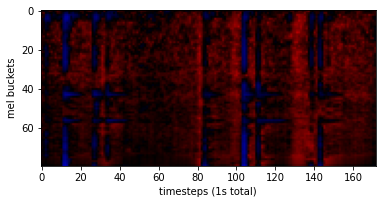

In [24]:
section = 1
assert section >= 0 and section < 10
h, w = diff.shape
diff_im = np.zeros((h, w, 3))
# mask is where the prediction is greater than the gt
mask = diff > 0.
# mask is where the gt is greater than the prediction
inv_mask = diff < 0.
# mask2 is where they're roughly the same
mask2 = np.isclose(diff, 0)
diff /= np.max(diff)
# Make the points where the prediction has more audio signal than the gt red
diff_im[:,:,0][mask] = diff[mask]
diff_im[:,:,1][mask2] = 1.
# Make the points where the gt has more audio signal than the prediction blue
diff_im[:,:,2][inv_mask] = -diff[inv_mask]
plt.xlabel("timesteps (1s total)")
plt.ylabel("mel buckets")
plt.imshow(diff_im[:,section*172:(section+1)*172,:])

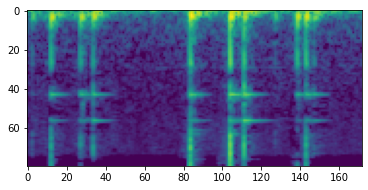

In [7]:
plt.imshow(r_arr[:,section*172:(section+1)*172])

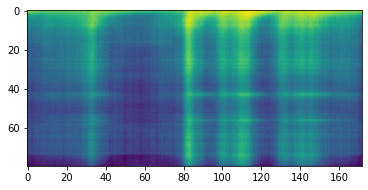

In [8]:
plt.imshow(p_arr[:,section*172:(section+1)*172])

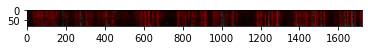

In [9]:
plt.imshow(diff_im)